In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from policy import Policy
from students import StudentPop
import util as u

# Simulations for 2-level model

In [ ]:
def twoLevelExpt(num_policies, capacity, num_students):
    
    # return values
    private_utils = np.zeros(num_policies)
    societal_utils = np.zeros(num_policies)
    student_welfares = np.zeros(num_policies)
    
    # values of c
    c_values = np.linspace(0.01, 1-capacity, num_policies)
    
    for c_index in range(num_policies):
        # model functions
        f = u.Uniform(2)
        g = u.SquareRoot(1)
        cost = u.Square(1, 0)
        
        pol_lambda = Policy([c_values[c_index]], capacity)
        students = StudentPop(num_students, pol_lambda, f, g, cost)
        
        private_utils[c_index] = students.private_util()
        societal_utils[c_index] = students.societal_util()
        student_welfares[c_index] = students.student_welfare()
    
    return c_values, private_utils, societal_utils, student_welfares 

def plotTradeoff(c_values, private_utils, societal_utils, student_welfares, cap, filestring='tradeoff'):
    plt.figure(figsize=(6,5))
    ax = plt.axes()
    ax.set_prop_cycle(color=['c', 'm', 'y', 'k'],
                      linestyle=['-', '--', '-.', ':'])
    
    plt.plot(c_values, private_utils, label='Private Utility')
    plt.plot(c_values, societal_utils, label='Societal Utility')
    plt.plot(c_values, student_welfares, label='Applicant Welfare')

            
    plt.legend(fontsize = 14)
    plt.title('Utility and Welfare Tradeoff', fontsize=18)
    ax = plt.axes()
    # Setting the background color
    ax.set_facecolor("white")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(color='0.9')
    plt.xlabel('c', fontsize=16)
    plt.savefig("../figures/%s.pdf" % filestring, format='pdf')
    plt.show()
    

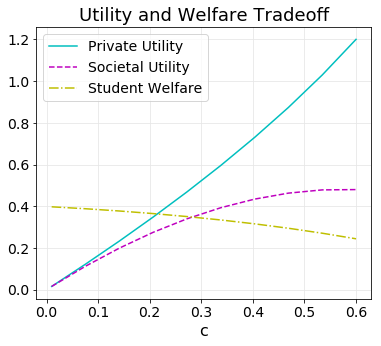

In [12]:
num_policies = 10
cap = 0.2
num_students = 200

c, pu, su, sw = twoLevelExpt(num_policies, cap, num_students)
plotTradeoff(c, pu, su, sw,cap, filestring="tradeoff-2" )

# Simulations for K-level model

In [6]:
def equilibrium(list_cutpoints, total_cap, list_probs, num_students):
    f = u.Uniform(2)
    g = u.SquareRoot(1)
    cost = u.Square(1, 0)

    pol_lambda = Policy(list_cutpoints, total_cap, list_probs)
    students = StudentPop(num_students, pol_lambda, f, g, cost)
    return students.pre_effort_ranks, students.efforts, students.scores

def plot_eqm(pre_effort_ranks, efforts, scores, k, filestring='eqm'):
    plt.figure(figsize=(6,5))
    ax = plt.axes()
    ax.set_prop_cycle(color=['c', 'm', 'y', 'k'],
                      linestyle=['-', '--', '-.', ':'])
    
    plt.plot(pre_effort_ranks, efforts, label='Effort')
    plt.plot(pre_effort_ranks,scores, label='Score')

            
    plt.legend(fontsize = 14)
    plt.title('Equlibrium efforts and scores (%d-level policy)'%k, fontsize=18)
    ax = plt.axes()
    # Setting the background color
    ax.set_facecolor("white")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(color='0.9')
    plt.xlabel('Pre-effort rank', fontsize=16)
    plt.savefig("../figures/%s.pdf" % filestring, format='pdf')
    plt.show()
    

/Users/tingruolydia/Documents/strategic_ranking/code/util.py:45: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt( x/ self.param) + self.argmin


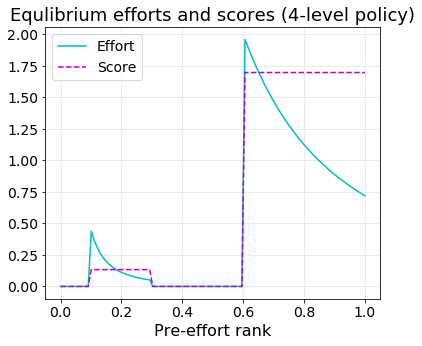

In [10]:
list_cutpoints = [0.1 ,0.3, 0.6]
total_cap = 0
list_probs = [0.2, 0,4, 0.9]
pr, ef, sc = equilibrium(list_cutpoints, total_cap, list_probs, 100)
plot_eqm(pr, ef, sc, len(list_cutpoints), filestring='eqm-4levels')